# Step 1: Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import hashlib
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

# Step 2: Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Products data
products_df = pd.read_csv('/content/drive/MyDrive/DL07_K306_Phạm Hồng Phát_Lê Thị Ngọc Phương/Topic 1 - Customer Segmentation/2 - Data/Products_with_Categories.csv')
print("✓ Products data loaded successfully")
print(f"  Shape: {products_df.shape}")

✓ Products data loaded successfully
  Shape: (167, 4)


In [ ]:
# Load Transactions data
transactions_df = pd.read_csv('/content/drive/MyDrive/DL07_K306_Phạm Hồng Phát_Lê Thị Ngọc Phương/Topic 1 - Customer Segmentation/2 - Data/Transactions.csv')
print("✓ Transactions data loaded successfully")
print(f"  Shape: {transactions_df.shape}")

✓ Transactions data loaded successfully
  Shape: (38765, 4)


# Step 3: Data Exporation

## Step 3.1 Products Dataset

In [ ]:
print("-" * 30)
print("Basic Info:")
print(f"Shape: {products_df.shape}")
print("-" * 30)
print(f"Columns: {list(products_df.columns)}")
print("-" * 30)
print("\nData Types:")
print(products_df.dtypes)
print("-" * 30)
print("\nFirst 5 rows:")
print(products_df.head())
print("-" * 30)
print("\nBasic Statistics:")
print(products_df.describe())
print("-" * 30)
print("\nMissing Values:")
print(products_df.isnull().sum())
print("-" * 30)
print("\nUnique productId Values:")
print(products_df.productId.nunique())
print("-" * 30)
print("\nUnique Category Values:")
print(products_df.Category.nunique())
print("\n Product Category Values:")
display(products_df.Category.unique())
print("-" * 30)
print("Top Categories by Product Count:")
display(products_df.Category.value_counts())

------------------------------
Basic Info:
Shape: (167, 4)
------------------------------
Columns: ['productId', 'productName', 'price', 'Category']
------------------------------

Data Types:
productId        int64
productName     object
price          float64
Category        object
dtype: object
------------------------------

First 5 rows:
   productId       productName  price         Category
0          1    tropical fruit    7.8       Fresh Food
1          2        whole milk    1.8            Dairy
2          3         pip fruit    3.0       Fresh Food
3          4  other vegetables    0.8       Fresh Food
4          5        rolls/buns    1.2  Bakery & Sweets
------------------------------

Basic Statistics:
       productId       price
count  167.00000  167.000000
mean    84.00000    6.040180
std     48.35287    4.949217
min      1.00000    0.300000
25%     42.50000    2.500000
50%     84.00000    4.900000
75%    125.50000    8.500000
max    167.00000   28.500000
--------------

array(['Fresh Food', 'Dairy', 'Bakery & Sweets', 'Household & Hygiene',
       'Beverages', 'Frozen & Processed Food', 'Pantry Staples',
       'Specialty & Seasonal', 'Pet Care', 'Personal Care', 'Snacks'],
      dtype=object)

------------------------------
Top Categories by Product Count:


,count
Category,
Fresh Food,27
Household & Hygiene,26
Beverages,20
Bakery & Sweets,19
Frozen & Processed Food,18
Dairy,17
Pantry Staples,14
Specialty & Seasonal,8
Personal Care,8


## Step 3.2 Transactions Dataset

In [ ]:
print("-" * 30)
print("Basic Info:")
print(f"Shape: {transactions_df.shape}")
print("-" * 30)
print(f"Columns: {list(transactions_df.columns)}")
print("-" * 30)
print("\nData Types:")
print(transactions_df.dtypes)
print("-" * 30)
print("\nFirst 5 rows:")
print(transactions_df.head())
print("-" * 30)
print("\nBasic Statistics:")
print(transactions_df.describe())
print("-" * 30)
print("\nMissing Values:")
print(transactions_df.isnull().sum())
print("-" * 30)
print("\nUnique Member_number Values:")
print(transactions_df.Member_number.nunique())

------------------------------
Basic Info:
Shape: (38765, 4)
------------------------------
Columns: ['Member_number', 'Date', 'productId', 'items']
------------------------------

Data Types:
Member_number     int64
Date             object
productId         int64
items             int64
dtype: object
------------------------------

First 5 rows:
   Member_number        Date  productId  items
0           1808  21-07-2015          1      3
1           2552  05-01-2015          2      1
2           2300  19-09-2015          3      3
3           1187  12-12-2015          4      3
4           3037  01-02-2015          2      1
------------------------------

Basic Statistics:
       Member_number     productId         items
count   38765.000000  38765.000000  38765.000000
mean     3003.641868     39.956094      1.996131
std      1153.611031     37.294166      0.817645
min      1000.000000      1.000000      1.000000
25%      2002.000000      9.000000      1.000000
50%      3005.000000     

## SUMMARY

### Product Dataset(167 products):
- Clean data: No missing values
- Product prices: Range from 0.3 to 28.5, with an average price of 6.04
- Categories: 11 values with top categories (having the most products) including  Fresh Food, Household & Hygiene, Beverages

### Transaction Dataset(38765 rows):
- Complete data: No missing values
- Number of customers: 3,898
- Date: The date column currently contains mixed formats and needs to be converted to a proper datetime format

# Step 4: Data Preprocessing and Merge Datasets

## Step 4.1 Convert Date column to datetime format

In [ ]:
# 1. Convert Date column to datetime format
print("\n1. Converting Date column to datetime format...")
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], format='%d-%m-%Y')
print(f"✅ Date conversion successful!")
print(f"Date range: {transactions_df['Date'].min()} to {transactions_df['Date'].max()}")


1. Converting Date column to datetime format...
✅ Date conversion successful!
Date range: 2014-01-01 00:00:00 to 2015-12-30 00:00:00


## Step 4.2 Merge transactions_df with products_df to get price information

In [ ]:
# 2. Merge transactions with products to get price information
print("\n2. Merging transactions with products data...")
df_merged = transactions_df.merge(products_df, on='productId', how='left')
print(f"✅ Merge successful! Shape: {df_merged.shape}")
print("-" * 30)
print(f"First 5 rows of merged data:")
display(df_merged.head(5))
print("-" * 30)
print("Basic Statistics:")
display(df_merged.describe())


2. Merging transactions with products data...
✅ Merge successful! Shape: (38765, 7)
------------------------------
First 5 rows of merged data:


,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


------------------------------
Basic Statistics:


,Member_number,Date,productId,items,price
count,38765.000000,38765,38765.000000,38765.000000,38765.000000
mean,3003.641868,2015-01-09 18:17:12.498387712,39.956094,1.996131,4.295170
min,1000.000000,2014-01-01 00:00:00,1.000000,1.000000,0.300000
25%,2002.000000,2014-07-12 00:00:00,9.000000,1.000000,1.250000
50%,3005.000000,2015-01-21 00:00:00,25.000000,2.000000,2.500000
75%,4007.000000,2015-07-10 00:00:00,64.000000,3.000000,6.100000
max,5000.000000,2015-12-30 00:00:00,167.000000,3.000000,28.500000
std,1153.611031,NaN,37.294166,0.817645,4.313656


## Step 4.3 Calculate total amount

In [ ]:
# 3. Calculate total amount
print("\n3. Calculating total amounts...")
df_merged['amount'] = df_merged['price'] * df_merged['items']
print("✅ Total amount calculated!")
print("First 5 rows of merged data after calculating total amount:")
display(df_merged.head(5))


3. Calculating total amounts...
✅ Total amount calculated!
First 5 rows of merged data after calculating total amount:


,Member_number,Date,productId,items,productName,price,Category,amount
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8


In [ ]:
# Check for any missing values after merge
print(f"\nMissing values after merge:")
print(df_merged.isnull().sum())


Missing values after merge:
Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
Category         0
amount           0
dtype: int64


## Step 4.4 Analyze transaction structure

In [ ]:
# 1. Analyze number of products bought per member per date
transaction_analysis = (
    df_merged.groupby(['Member_number', 'Date'])['productId']
    .nunique()
    .reset_index(name='unique_products')
)

# Look at first few rows of analysis
display(transaction_analysis.head())

,Member_number,Date,unique_products
0,1000,2014-06-24,3
1,1000,2015-03-15,4
2,1000,2015-05-27,2
3,1000,2015-07-24,2
4,1000,2015-11-25,2


In [ ]:
# Check if most member-date pairs have multiple products
print("Distribution of unique products per transaction:")
print(transaction_analysis['unique_products'].value_counts().sort_index())

Distribution of unique products per transaction:
unique_products
1       205
2     10012
3      2727
4      1273
5       338
6       179
7       113
8        96
9        19
10        1
Name: count, dtype: int64


### KEY INSIGHTS:
- Majority of combination(Member_number and Date) have >1 product
- The largest group is 2 products per combination → 10,012 combinations
- Then 3 products (2,727 combinations), 4 products (1,273 combinations), etc
- Only 205 combinations had just a single product
This proves that most shopping visits involve multiple products

### FINAL DECISION:
- Unique transaction key = (Member_number, Date)
- Reason: A transaction represents a shopping visit, not a single product line
- Since most members buy multiple products in one day, (Member_number, Date) is the correct identifier
- (Member_number, Date, productId) would break one true transaction into several fake ones, distorting RFM analysis


## Step 4.5 Create Transaction Key & Aggregate

In [ ]:
import hashlib

print("\n4.5.1 Creating transaction_key by hashing Member_number and Date...")

# Function to hash member_number + date
def generate_transaction_key(row):
    raw_key = f"{row['Member_number']}_{row['Date']}"
    return hashlib.md5(raw_key.encode()).hexdigest()

# Apply the function to create a hashed transaction_key
df_merged['transaction_key'] = df_merged.apply(generate_transaction_key, axis=1)

print("✅ transaction_key (hashed) created!")
print("Number of unique transaction keys:", df_merged['transaction_key'].nunique())
print("Number of rows in dataset:", len(df_merged))

# Preview
print("\nFirst 5 transaction keys:")
display(df_merged[['Member_number', 'Date', 'transaction_key']].head())


4.5.1 Creating transaction_key by hashing Member_number and Date...
✅ transaction_key (hashed) created!
Number of unique transaction keys: 14963
Number of rows in dataset: 38765

First 5 transaction keys:


,Member_number,Date,transaction_key
0,1808,2015-07-21,179430f26748d9b5d6625b8f055745eb
1,2552,2015-01-05,dfcea95780cb998e8f7e31cac8029ca5
2,2300,2015-09-19,2c77ad86922ac25eb3abca13c6ee982a
3,1187,2015-12-12,a354430317336661b3003dceec45d646
4,3037,2015-02-01,039f212a0d00ccfe4dcea85810c4f636


In [ ]:
# Aggregate transactions at transaction_key level
print("\n4.5.2 Aggregating transactions at transaction_key level...")
transactions_agg = (
    df_merged.groupby(['transaction_key', 'Member_number', 'Date'])
    .agg(
        total_items=('items', 'sum'),
        total_amount=('amount', 'sum')
    )
    .reset_index()
)

print("✅ Aggregation successful!")
print("Shape after aggregation:", transactions_agg.shape)
print("First 5 aggregated transactions:")
display(transactions_agg.head())



4.5.2 Aggregating transactions at transaction_key level...
✅ Aggregation successful!
Shape after aggregation: (14963, 5)
First 5 aggregated transactions:


,transaction_key,Member_number,Date,total_items,total_amount
0,000017f88ab715d2f234c571839615de,1583,2014-02-09,4,23.8
1,000048826db4353fdd2617ba55070e80,1712,2014-04-12,5,45.9
2,0011286a66b16b721ebf0fbe6b6e4ba3,4776,2015-08-08,19,67.9
3,0014680dc5842e3ccd6fb23d98352aa5,2769,2015-07-21,6,40.8
4,001593fd07b3e743e062dfc1ed09c6a1,4190,2014-08-24,4,27.6


### SUMMARY
#### 1. Transaction Key Creation
- A hashed `transaction_key` was generated using `Member_number` + `Date`
- This ensures each shopping visit is uniquely and compactly identified
- Result: 14,963 unique transactions from 38,765 line-item rows

#### 2. Aggregation at Transaction Level
- All product line items belonging to the same transaction were grouped together
- Computed:
  - `total_items` = sum of items purchased in the transaction
  - `total_amount` = total money spent in the transaction
- Dataset reduced from `product-level` (38,765 rows) to `transaction-level` (14,963 rows)


## Step 4.6 Sales Trends & Product Insights

### Step 4.6.1 Daily Total Sales Trend

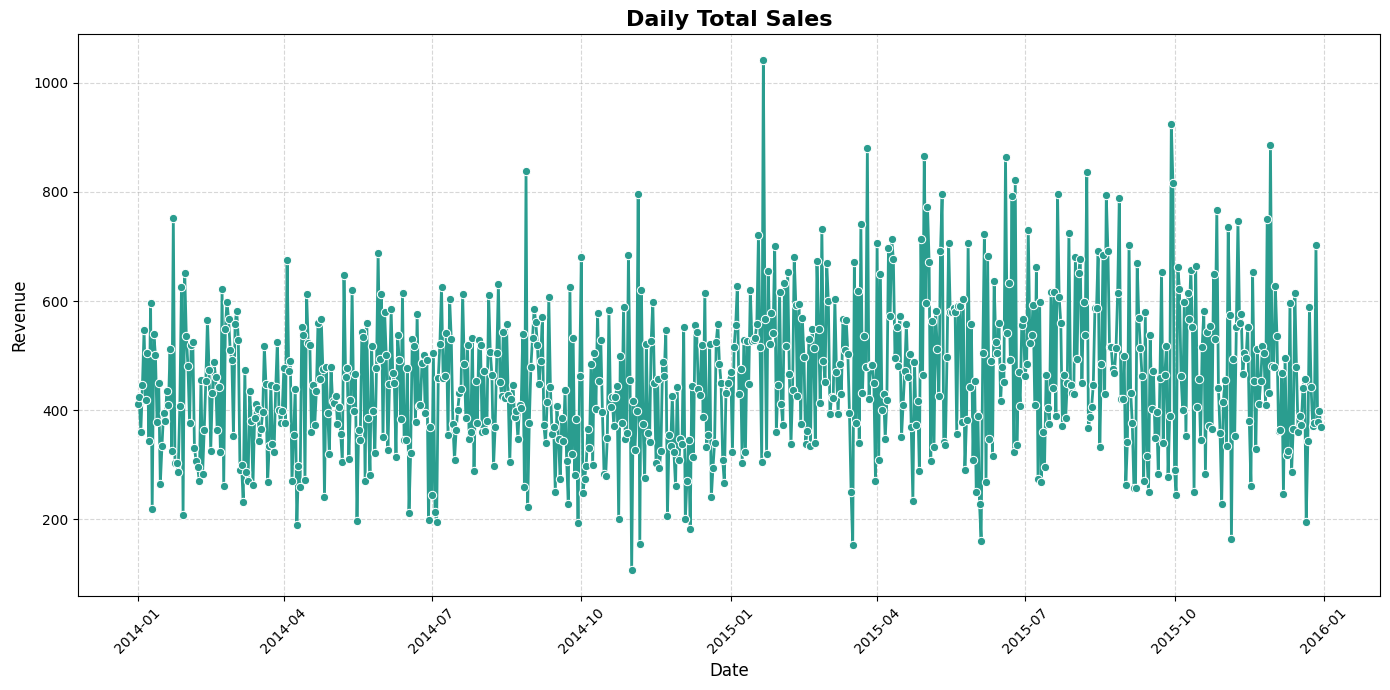

In [ ]:
# Overall daily sales trend
daily_total = transactions_agg.groupby("Date")["total_amount"].sum()

plt.figure(figsize=(14,7))
sns.lineplot(x=daily_total.index, y=daily_total.values, marker="o", color="#2a9d8f", linewidth=2)
plt.title("Daily Total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Step 4.6.2 Monthly total sales trend

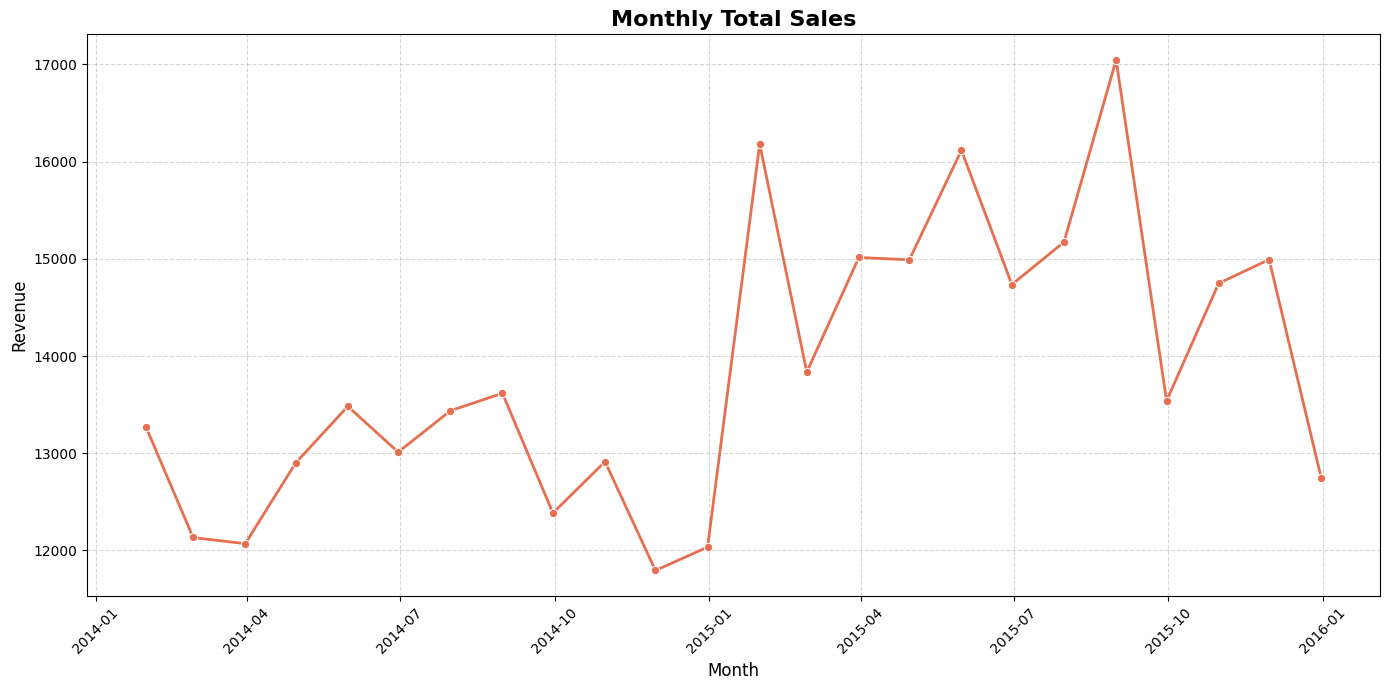

In [ ]:
monthly_total = transactions_agg.set_index("Date").resample("M")["total_amount"].sum()

plt.figure(figsize=(14,7))
sns.lineplot(x=monthly_total.index, y=monthly_total.values, marker="o", color="#e76f51", linewidth=2)
plt.title("Monthly Total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Step 4.6.3 Revenue by product category

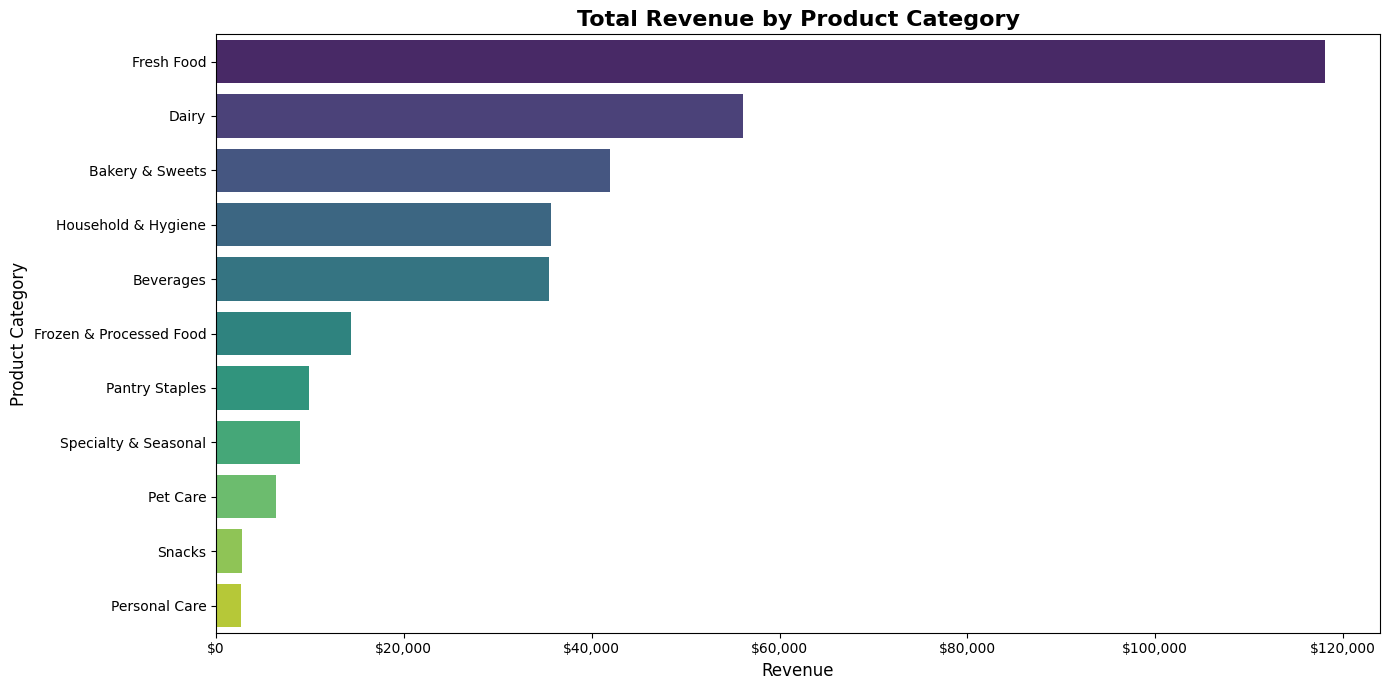

In [ ]:
# Revenue by product category
category_revenue = df_merged.groupby("Category")["amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="viridis")
plt.title("Total Revenue by Product Category", fontsize=16, fontweight='bold')
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.show()

### SUMMARY
1. Daily Total Sales Trend
  * Revenue fluctuates mostly in the range of $300 ~ 600 per day
  * The line fluctuates significantly from day to day, showing that customer activity is not evenly distributed. Some days are much busier than others
  * One particular day spikes over 1000 in revenue, while others hardly drop to below 200
  * There isn't a strong repeating seasonal cycle visible

2. Monthly total sales trend
  *   In 2014, most months hover between $12,000 ~ 13,500 revenue, with small

  *   2015 was a stronger sales year than 2014, with monthly revenues often in the $14,000 ~ 17,000 range

  * Feb 2015 shows a very sharp spike (~16,200 revenue) compared to the months before (just ~12,000 in Dec 2014)

      &rarr; The store is expanding or retaining customers better.

3. Revenue by Product Category
  * Fresh Food dominates sales, contributing ~$120,000, nearly double the second-highest category and over one third of total revenue comes from Fresh Food alone. Because essentials like fruits, vegetables, meat, and fish sell daily.

  * Similarly, Dairy and Bakery & Sweets (like milk, yogurt, cheese, bread and beverages) are also daily/weekly necessities.

  * Mid-tier contributors: Household & Hygiene, Beverages

  * Pantry Staples, Specialty & Seasonal, Pet Care, Snacks, Personal Care contributes much less compared to top categories, but they’re still valuable for cross-selling


# Step 5: RFM - Feature Engineering and Visualization

## Step 5.1 Calculate RFM

In [ ]:
print("\n5.1 Calculating RFM metrics...")

# Reference date = last date in dataset (to measure recency)
reference_date = transactions_agg['Date'].max()
print("Reference date for Recency calculation:", reference_date)

# Group by customer to calculate RFM
rfm = (
    transactions_agg.groupby('Member_number')
    .agg(
        Recency=('Date', lambda x: (reference_date - x.max()).days),  # days since last purchase
        Frequency=('transaction_key', 'nunique'),                     # number of unique transactions
        Monetary=('total_amount', 'sum')                              # total spent
    )
    .reset_index()
)

print("✅ RFM table created!")
print("Shape:", rfm.shape)
print("First 5 rows of RFM:")
display(rfm.head())


5.1 Calculating RFM metrics...
Reference date for Recency calculation: 2015-12-30 00:00:00
✅ RFM table created!
Shape: (3898, 4)
First 5 rows of RFM:


,Member_number,Recency,Frequency,Monetary
0,1000,35,5,53.80
1,1001,242,5,100.00
2,1002,122,4,70.30
3,1003,323,4,60.65
4,1004,28,8,204.96


## Step 5.2 Analyze and Visualize RFM

### Step 5.2.1 Basic Statistics

In [ ]:
print("\n5.2.1 Summary statistics of RFM variables:")
display(rfm.describe())



5.2.1 Summary statistics of RFM variables:


,Member_number,Recency,Frequency,Monetary
count,3898.000000,3898.000000,3898.000000,3898.000000
mean,3002.959979,187.701385,3.838635,85.212835
std,1155.806001,159.912688,1.883678,55.620089
min,1000.000000,0.000000,1.000000,1.300000
25%,1999.250000,57.000000,2.000000,43.810000
50%,3004.500000,141.000000,4.000000,74.900000
75%,4002.750000,280.000000,5.000000,115.295000
max,5000.000000,727.000000,11.000000,375.310000


### Step 5.2.2 Check for Skewness / Outliers

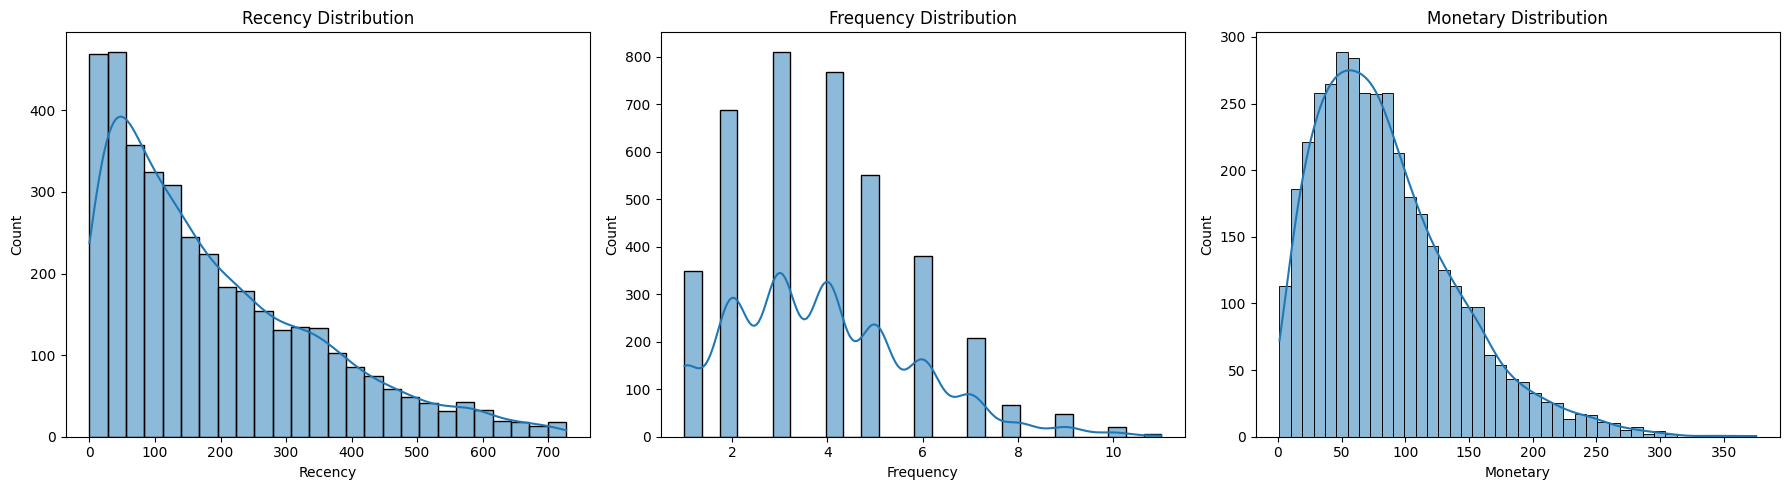

In [ ]:
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], kde=True, ax=axes[0]).set_title("Recency Distribution")
sns.histplot(rfm['Frequency'], kde=True, ax=axes[1]).set_title("Frequency Distribution")
sns.histplot(rfm['Monetary'], kde=True, ax=axes[2]).set_title("Monetary Distribution")
plt.tight_layout()
plt.show()

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), len(series), (len(outliers) / len(series)) * 100

rec_outliers, rec_total, rec_pct = count_outliers(rfm['Recency'])
freq_outliers, freq_total, freq_pct = count_outliers(rfm['Frequency'])
mon_outliers, mon_total, mon_pct = count_outliers(rfm['Monetary'])

print(f"Recency outliers: {rec_outliers}/{rec_total} ({rec_pct:.2f}%)")
print(f"Frequency outliers: {freq_outliers}/{freq_total} ({freq_pct:.2f}%)")
print(f"Monetary outliers: {mon_outliers}/{mon_total} ({mon_pct:.2f}%)")

Recency outliers: 68/3898 (1.74%)
Frequency outliers: 26/3898 (0.67%)
Monetary outliers: 97/3898 (2.49%)


### SUMMARY

**Statistical Summary of RFM Variables**

| Metric        | Range           | Median   | Mean     | Interpretation                                                                                                                                                                                                                         |
| ------------- | --------------- | -------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Recency**   | 0 – 727 days    | 141 days | 188 days | - Half of the customers have not purchased anything in the last 141 days, indicating a large inactive segment. <br>- Recency values span from very recent purchases to over 2 years ago, highlighting mixed customer engagement.       |
| **Frequency** | 1 – 11          | 4        | 3.8      | - Most customers made between 1 and 5 purchases. <br>- Only a small subset of customers shop very frequently, showing a core loyal base.                                                                                               |
| **Monetary**  | \$1.3 – \$375.3 | \$74.9   | \$85.2   | - Spending is heavily right-skewed: a majority spend small amounts under \$100, while a few customers have very high spending, raising the average. <br>- High spenders likely represent families or businesses making bulk purchases. |

**Distribution Analysis and Insights**
1. Recency
  - The distribution is right-skewed
    - A large proportion of customers have purchased within the last 100 days, showing recent engagement
    - However, there is a long tail of customers with recency values up to 727 days (nearly 2 years), signaling many inactive or lapsed customers
  - Implication: This long tail represents an opportunity for targeted reactivation campaigns to win back inactive customers before they fully churn or switch to competitors (convenience, supermarket, online delivery)

2. Frequency
  - Most customers have a low to moderate purchase frequency (1 to 5 transactions)
  - Very few customers exceed 8 transactions
  - This points to a customer base dominated by occasional shoppers, with a small but valuable group of high-frequency buyers
  - Ideally, essentials should drive repeat weekly or monthly purchases
  - Customers with low frequency are likely shopping elsewhere
    - Implication: Efforts to increase purchase frequency among occasional buyers (e.g., loyalty programs, reminders) could boost retention and sales

3. Monetary

  - Monetary values are right-skewed:
    - The majority of customers spend less than $100 overall

    - A VIP/high-value segment exists, spending between 200 and 375, representing heavy buyers such as families or small businesses

  - Implication: These high-value customers should be prioritized with special offers, personalized services, or loyalty rewards to encourage repeat business and maximize lifetime value

&rarr; Since Store X sells daily necessitie and base mostly consists of occasional shoppers, with only a small group of loyal, high-value buyers. Many customers haven’t returned in months, showing a high risk of churn. Essentials like Fresh Food drive sales, but low frequency suggests customers may be shopping elsewhere.

To grow, Store X should focus on:
- Reactivating inactive customers
- Increasing purchase frequency
- Retaining top spenders

The key is to build trust and convenience — customers don’t need flashy promotions. What they value most is reliability, freshness, and a sense that the store understands their habits.



## Step 5.3 Save RFM table to CSV

In [ ]:
# Save RFM table to CSV
rfm.to_csv("/content/drive/MyDrive/DL07_K306_Phạm Hồng Phát_Lê Thị Ngọc Phương/Topic 1 - Customer Segmentation/2 - Data/rfm_table.csv", index=False)
print("✅ RFM table saved to rfm_table.csv")

✅ RFM table saved to rfm_table.csv
